In [1]:
from flood_model import FloodModel_1
import pandas as pd

In [12]:
model = FloodModel_1(seed=1)
for i in range(200):
    model.step()

df = pd.DataFrame(model.floods, columns=['Time', 'Return'])
# df = df.set_index('Time')
df.head()

,Time,Return
0,8,10
1,17,10
2,18,10
3,20,10
4,36,10


In [9]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [8]:
# sns.scatterplot(data=df)

TypeError: unhashable type: 'list'

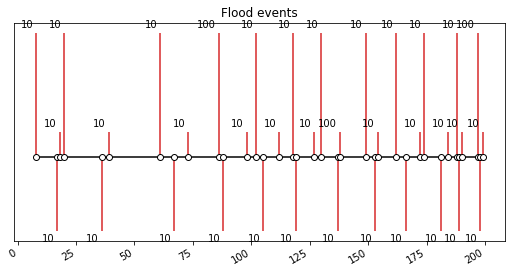

In [13]:
# taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
# Choose some nice levels
levels = np.tile([5, -3, 1],
                 int(np.ceil(len(df['Return'])/3)))[:len(df['Return'])]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4)) #, layout="constrained")
ax.set(title="Flood events")

ax.vlines(df['Time'], 0, levels, color="tab:red")  # The vertical stems.
ax.plot(df['Time'], np.zeros_like(df['Time']), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(df['Time'], levels, df['Return']):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()